In [2]:
import pandas as pd

# Example with Fake and Real News dataset
df = pd.read_csv("fake_or_real.csv")

# Preview
df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
# Check class balance
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michealomotosho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import pandas as pd

# Load your data
df = pd.read_csv("fake_or_real.csv")  

# Combine title and text for better context
df['content'] = df['title'].fillna('') + ' ' + df['text'].fillna('')


In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_content'] = df['content'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michealomotosho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned content
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_content'])

# Encode labels (REAL = 1, FAKE = 0)
df['label_num'] = df['label'].map({'FAKE': 0, 'REAL': 1})
y = df['label_num']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.92      0.91       628
           1       0.92      0.91      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  # Requires: pip install xgboost

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(kernel='linear', probability=True)  # linear SVM for text
}


In [15]:
from sklearn.metrics import accuracy_score, classification_report

results = {}

for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    results[name] = acc


Training: Logistic Regression

Logistic Regression Accuracy: 0.9148
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       628
           1       0.92      0.91      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

Training: Random Forest

Random Forest Accuracy: 0.9203
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       628
           1       0.92      0.93      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

Training: XGBoost


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [04:08:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.9361
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       628
           1       0.93      0.94      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267

Training: SVM

SVM Accuracy: 0.9282
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       628
           1       0.93      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



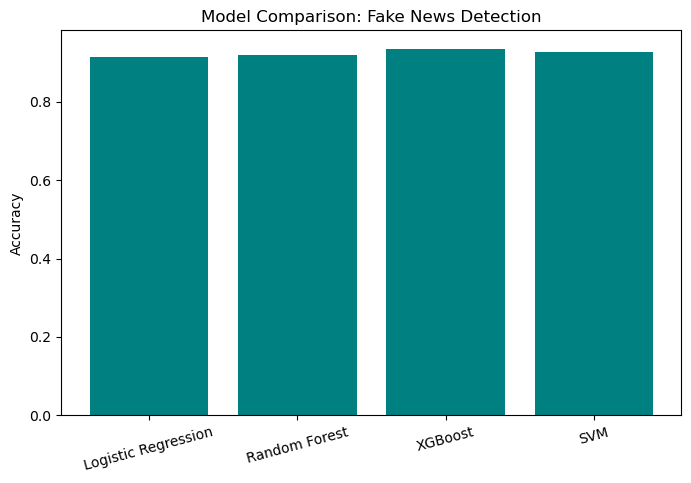

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='teal')
plt.ylabel("Accuracy")
plt.title("Model Comparison: Fake News Detection")
plt.xticks(rotation=15)
plt.show()


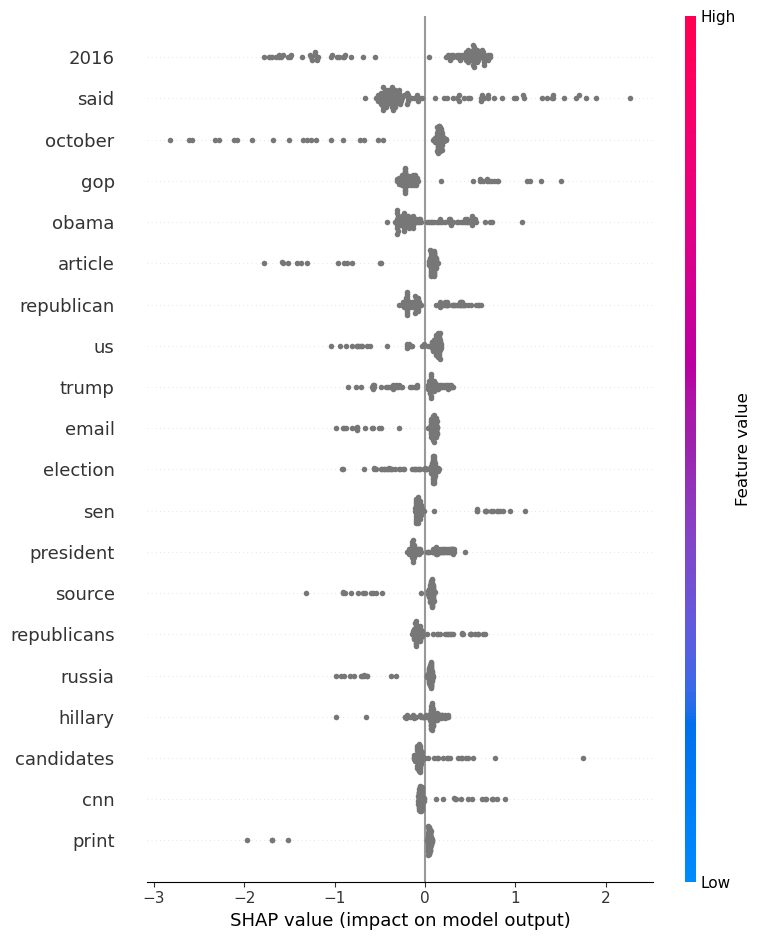

In [17]:
import shap

# Use a small sample for speed
X_sample = X_test[:100]

# Create explainer for your best model (e.g., XGBoost)
explainer = shap.Explainer(models['XGBoost'])
shap_values = explainer(X_sample)

# Visualize
shap.summary_plot(shap_values, X_sample, feature_names=vectorizer.get_feature_names_out())



In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(models['XGBoost'], X, y, cv=5)
print("XGBoost 5-Fold CV Accuracy:", scores.mean())


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [04:10:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [04:10:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [04:10:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [04:10:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

XGBoost 5-Fold CV Accuracy: 0.9297553275453827


In [23]:
import joblib

# Save model and TF-IDF vectorizer
joblib.dump(models['XGBoost'], "xgboost_fake_news_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']